In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()
print(sc.version)
print(spark.version)

2.4.8
2.4.8


In [2]:
import pandas as pd
from sqlalchemy import create_engine
from pyspark.sql.functions import col
import psycopg2 
import io

In [3]:
# read in the data as a PySpark DataFrame
data = spark.read.format('csv').option('header', True).load('C:/Users/ECE552-G01388906-h/Downloads/Civil_List.csv')

# renaming the column and removing the unwanted spaces
data = data.withColumnRenamed('EMPLOYEE NAME   ', 'EMPLOYEE NAME')

data.show()

+-------------+-----------+-------------+--------------------+----------+---------+-----------+
|CALENDAR YEAR|AGENCY CODE|EMPLOYEE NAME|         AGENCY NAME|TITLE CODE|PAY CLASS|SALARY RATE|
+-------------+-----------+-------------+--------------------+----------+---------+-----------+
|         2021|        868| A M O'CONNER|DEPARTMENT OF CIT...|     21744|        A| $86,000.00|
|         2021|         56|T J O'CONNELL|   POLICE DEPARTMENT|     70210|        D| $63,125.00|
|         2021|        998|S A O'CONNELL|N.Y.C. TRANSIT AU...|     00808|       04|$131,997.00|
|         2021|         56|S M O'CONNELL|   POLICE DEPARTMENT|     70210|        D| $45,000.00|
|         2021|         57|P J O'CONNELL|     FIRE DEPARTMENT|     70310|        D| $85,292.00|
|         2021|        827|P F O'CONNELL|DEPARTMENT OF SAN...|     70112|        F| $83,465.00|
|         2021|         56|P J O'CONNELL|   POLICE DEPARTMENT|     7021A|        D| $96,502.00|
|         2021|         67|N T O'CONNELL

In [4]:
from pyspark.sql.functions import col
# rename the "old_col" column to "new_col"
data = data.withColumnRenamed('EMPLOYEE NAME   ', 'EMPLOYEE NAME1')

data.show()

+-------------+-----------+-------------+--------------------+----------+---------+-----------+
|CALENDAR YEAR|AGENCY CODE|EMPLOYEE NAME|         AGENCY NAME|TITLE CODE|PAY CLASS|SALARY RATE|
+-------------+-----------+-------------+--------------------+----------+---------+-----------+
|         2021|        868| A M O'CONNER|DEPARTMENT OF CIT...|     21744|        A| $86,000.00|
|         2021|         56|T J O'CONNELL|   POLICE DEPARTMENT|     70210|        D| $63,125.00|
|         2021|        998|S A O'CONNELL|N.Y.C. TRANSIT AU...|     00808|       04|$131,997.00|
|         2021|         56|S M O'CONNELL|   POLICE DEPARTMENT|     70210|        D| $45,000.00|
|         2021|         57|P J O'CONNELL|     FIRE DEPARTMENT|     70310|        D| $85,292.00|
|         2021|        827|P F O'CONNELL|DEPARTMENT OF SAN...|     70112|        F| $83,465.00|
|         2021|         56|P J O'CONNELL|   POLICE DEPARTMENT|     7021A|        D| $96,502.00|
|         2021|         67|N T O'CONNELL

In [5]:
# Remove spaces from column names and replace with underscore
#please execute only once
cols = [col(c).alias(c.replace(' ', '_')) for c in data.columns]

# writing in to parquet
data = data.select(cols)
data.write.parquet('C:/Users/ECE552-G01388906-h/Downloads/parquet1')




In [6]:
data.show()

+-------------+-----------+-------------+--------------------+----------+---------+-----------+
|CALENDAR_YEAR|AGENCY_CODE|EMPLOYEE_NAME|         AGENCY_NAME|TITLE_CODE|PAY_CLASS|SALARY_RATE|
+-------------+-----------+-------------+--------------------+----------+---------+-----------+
|         2021|        868| A M O'CONNER|DEPARTMENT OF CIT...|     21744|        A| $86,000.00|
|         2021|         56|T J O'CONNELL|   POLICE DEPARTMENT|     70210|        D| $63,125.00|
|         2021|        998|S A O'CONNELL|N.Y.C. TRANSIT AU...|     00808|       04|$131,997.00|
|         2021|         56|S M O'CONNELL|   POLICE DEPARTMENT|     70210|        D| $45,000.00|
|         2021|         57|P J O'CONNELL|     FIRE DEPARTMENT|     70310|        D| $85,292.00|
|         2021|        827|P F O'CONNELL|DEPARTMENT OF SAN...|     70112|        F| $83,465.00|
|         2021|         56|P J O'CONNELL|   POLICE DEPARTMENT|     7021A|        D| $96,502.00|
|         2021|         67|N T O'CONNELL

In [7]:
data = spark.read.format("parquet").load("C:/Users/ECE552-G01388906-h/Downloads/parquet1")

In [7]:
type(data)

pyspark.sql.dataframe.DataFrame

In [8]:
#salary_rate converting to float
from pyspark.sql.functions import regexp_replace, col

data = data.withColumn("SALARY_RATE", regexp_replace(col("SALARY_RATE"), "[\$,]", "").cast("float"))

In [9]:
data.show()

+-------------+-----------+-------------------+--------------------+----------+---------+-----------+
|CALENDAR_YEAR|AGENCY_CODE|      EMPLOYEE_NAME|         AGENCY_NAME|TITLE_CODE|PAY_CLASS|SALARY_RATE|
+-------------+-----------+-------------------+--------------------+----------+---------+-----------+
|         2017|         56|H T EGGENS         |POLICE DEPARTMENT...|     70210|       D |    85292.0|
|         2017|        466|A   LO             |CUNY MANHATTAN CO...|     04017|       B |    58787.0|
|         2017|         56|K D SHEPHARD       |POLICE DEPARTMENT...|     71012|       A |    46304.0|
|         2017|        470|J A SCHIAPPA       |CUNY HUNTER COLLE...|     04617|       N |     176.21|
|         2017|         56|F E MANCUSO        |POLICE DEPARTMENT...|     7021A|       D |    91785.0|
|         2017|         56|T L SMITH          |POLICE DEPARTMENT...|     60817|       A |    42136.0|
|         2017|         56|T L SMITH          |POLICE DEPARTMENT...|     60817|   

In [10]:
# connecting to postgres db 
db = {
    "driver": "org.postgresql.Driver",
    "url": "jdbc:postgresql://localhost:5432/ECE552FINAL",
    "user": "postgres",
    "password": "mypostgres"
}

# naming table
table_name = "civil_list"

# Writing DataFrame in to database table
data.write.jdbc(
    url=db["url"],
    table=table_name,
    mode="overwrite",
    properties=db
)

In [14]:
data

DataFrame[CALENDAR_YEAR: string, AGENCY_CODE: string, EMPLOYEE_NAME: string, AGENCY_NAME: string, TITLE_CODE: string, PAY_CLASS: string, SALARY_RATE: float]

In [11]:
#fetch variables
from pyspark.sql import SparkSession

# creating a spark session
spark = SparkSession.builder.appName("Postgres to PySpark").getOrCreate()

# defining postgresql jdbc url
jdbcUrl = "jdbc:postgresql://localhost:5432/ECE552FINAL"

# define the properties for the jdbc connection
connectionProperties = {
    "user": "postgres",
    "password": "mypostgres",
    "driver": "org.postgresql.Driver"
}

# define the table name
table = "civil_list"

# reading from postgresql into a PySpark DataFra
data_frame = spark.read.jdbc(url=jdbcUrl, table=table, properties=connectionProperties)

data_frame.show()


+-------------+-----------+-------------+--------------------+----------+---------+-----------+
|CALENDAR_YEAR|AGENCY_CODE|EMPLOYEE_NAME|         AGENCY_NAME|TITLE_CODE|PAY_CLASS|SALARY_RATE|
+-------------+-----------+-------------+--------------------+----------+---------+-----------+
|         2019|        740|   M   THOMAS|DEPARTMENT OF EDU...|     51221|        X|      57.31|
|         2019|        998|   M   THOMAS|N.Y.C. TRANSIT AU...|     00341|       04|    66920.0|
|         2019|        998|   M E THOMAS|N.Y.C. TRANSIT AU...|     00609|       03|    70864.0|
|         2019|        998|   M   THOMAS|N.Y.C. TRANSIT AU...|     00650|       03|    73886.0|
|         2019|        996|   M F THOMAS|N.Y.C. HOUSING AU...|     10050|        A|   128461.0|
|         2019|        826|   M L THOMAS|DEPARTMENT OF ENV...|     90756|        K|     352.32|
|         2019|        465|   M A THOMAS|CUNY KINGSBOROUGH...|     04294|        P|      21.47|
|         2019|         67|   M C THOMAS

In [12]:
#identifying null values
from pyspark.sql.functions import col, sum


null_counting = data_frame.select([sum(col(c).isNull().cast("int")).alias(c) for c in data_frame.columns])
null_counting.show()


+-------------+-----------+-------------+-----------+----------+---------+-----------+
|CALENDAR_YEAR|AGENCY_CODE|EMPLOYEE_NAME|AGENCY_NAME|TITLE_CODE|PAY_CLASS|SALARY_RATE|
+-------------+-----------+-------------+-----------+----------+---------+-----------+
|            0|          0|            0|          0|         9|        0|          0|
+-------------+-----------+-------------+-----------+----------+---------+-----------+



In [14]:
#removing title_code because it is not necessary
data_frame=data_frame.drop('TITLE_CODE')

In [15]:
data_frame

DataFrame[CALENDAR_YEAR: string, AGENCY_CODE: string, EMPLOYEE_NAME: string, AGENCY_NAME: string, PAY_CLASS: string, SALARY_RATE: float]

In [16]:
#avg salary in each agencies over the year 
from pyspark.sql.functions import year, avg

# group by agency,year and calculate the average salary
s=data_frame.groupBy('AGENCY_NAME', year('CALENDAR_YEAR').alias('YEAR')) \
  .agg(avg('SALARY_RATE').alias('AVG_SALARY')) \
  .orderBy('AGENCY_NAME', 'YEAR')
s=s.toPandas()


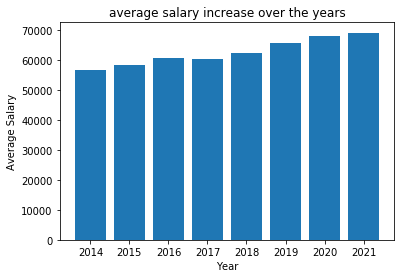

In [17]:
#plotting bargraph
import matplotlib.pyplot as plt
import numpy as np

# Group data using year
grouped = s.groupby('YEAR')

#  mean salary for each year
mean_salary = grouped['AVG_SALARY'].mean()

# Getting the years
years = mean_salary.index.values

# Create a bar plot
plt.bar(years, mean_salary)

# Adding axis 
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title("average salary increase over the years")


plt.show()

In [18]:
#converting python dataframe to pysparkdataframe
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("PandasToSpark").getOrCreate()

# Converting Pandas DataFrame to PySpark DataFrame
s= spark.createDataFrame(s)


s.show()

+--------------------+----+------------------+
|         AGENCY_NAME|YEAR|        AVG_SALARY|
+--------------------+----+------------------+
|ADMINISTRATION FO...|2014| 58464.44749545846|
|ADMINISTRATION FO...|2015|  60380.9373632701|
|ADMINISTRATION FO...|2016|   63775.233690396|
|ADMINISTRATION FO...|2017|63873.436138856625|
|ADMINISTRATION FO...|2018| 66537.36012758137|
|ADMINISTRATION FO...|2019| 67250.05767459163|
|ADMINISTRATION FO...|2020| 69319.96959509097|
|ADMINISTRATION FO...|2021| 69149.66757808827|
|BOARD OF CORRECTIONS|2014| 69134.22222222222|
|BOARD OF CORRECTIONS|2015|          77214.05|
|BOARD OF CORRECTIONS|2016|          86710.25|
|BOARD OF CORRECTIONS|2018|        80109.5625|
|BOARD OF CORRECTIONS|2019| 87335.33447265625|
|BOARD OF CORRECTIONS|2020| 89975.09654017857|
|BOARD OF CORRECTIONS|2021|     101199.224375|
|BOARD OF CORRECTI...|2017|       78876.21875|
|  BOARD OF ELECTIONS|2014|21824.467949276703|
|  BOARD OF ELECTIONS|2015|30477.354413682137|
|  BOARD OF E

In [19]:
#percentage increase
from pyspark.sql.functions import lag, col
from pyspark.sql.window import Window



grouping_year = s.groupBy('YEAR').agg({'AVG_SALARY': 'mean'}).withColumnRenamed('avg(AVG_SALARY)', 'AVG_SALARY')

# Calculate the percentage increase in average salary from the previous year to the current year
lagging = grouping_year.select('YEAR', 'AVG_SALARY', lag('AVG_SALARY', 1).over(Window.orderBy('YEAR')).alias('PREV_AVG_SALARY'))
increasing_percent = lagging.withColumn('PERCENT_INCREASE', (col('AVG_SALARY') - col('PREV_AVG_SALARY')) / col('PREV_AVG_SALARY') * 100)


increasing_percent.show()


+----+-----------------+-----------------+-------------------+
|YEAR|       AVG_SALARY|  PREV_AVG_SALARY|   PERCENT_INCREASE|
+----+-----------------+-----------------+-------------------+
|2014|56578.80600436691|             null|               null|
|2015|58382.18990047818|56578.80600436691| 3.1873841522425916|
|2016|60663.35797704908|58382.18990047818| 3.9073013199051285|
|2017|60291.32950346056|60663.35797704908|-0.6132671945546965|
|2018|62426.63851901713|60291.32950346056|  3.541651897780766|
|2019|65658.61988100666|62426.63851901713|  5.177247147473694|
|2020|68105.72891964523|65658.61988100666|  3.727018696210004|
|2021|69180.01472229499|68105.72891964523| 1.5773794946343729|
+----+-----------------+-----------------+-------------------+



In [20]:
increasing_percent.toPandas()

,YEAR,AVG_SALARY,PREV_AVG_SALARY,PERCENT_INCREASE
0,2014,56578.806004,NaN,NaN
1,2015,58382.189900,56578.806004,3.187384
2,2016,60663.357977,58382.189900,3.907301
3,2017,60291.329503,60663.357977,-0.613267
4,2018,62426.638519,60291.329503,3.541652
5,2019,65658.619881,62426.638519,5.177247
6,2020,68105.728920,65658.619881,3.727019
7,2021,69180.014722,68105.728920,1.577379


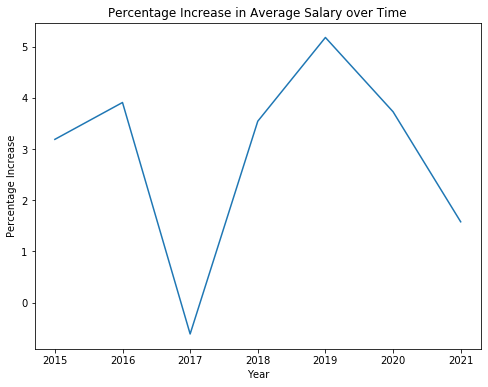

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark dataframe to Pandas dataframe
increasing_percent_pandas = increasing_percent.toPandas()

#  figure size
plt.figure(figsize=(8, 6))

# Creating a line plot
plt.plot(increasing_percent_pandas['YEAR'], increasing_percent_pandas['PERCENT_INCREASE'])

# Setting up the axis labels
plt.xlabel('Year')
plt.ylabel('Percentage Increase')

# Set the title
plt.title('Percentage Increase in Average Salary over Time')

# Show the plot
plt.show()


In [26]:
#Agencies recieving highest salary in each year
from pyspark.sql.functions import desc, row_number
from pyspark.sql.window import Window

# window function to partition by year and order by salary rate in descending order
w1 = Window.partitionBy('CALENDAR_YEAR').orderBy(desc('SALARY_RATE'))

#  window function to assign row numbers to each row in the window
rank_df = data_frame.select('*', row_number().over(w1).alias('rank')).filter('rank = 1')

# Select the desired columns
results_df = rank_df.select('CALENDAR_YEAR', 'AGENCY_NAME', 'SALARY_RATE')

results_df=results_df.orderBy('CALENDAR_YEAR')

results_df.show()


+-------------+--------------------+-----------+
|CALENDAR_YEAR|         AGENCY_NAME|SALARY_RATE|
+-------------+--------------------+-----------+
|         2014|N.Y.C. TRANSIT AU...|   300000.0|
|         2015|OFFICE OF THE COM...|   350000.0|
|         2016|OFFICE OF THE COM...|   350000.0|
|         2017|OFFICE OF THE COM...|   350000.0|
|         2018|OFFICE OF THE COM...|   350000.0|
|         2019|N.Y.C. HOUSING AU...|   414707.0|
|         2020|N.Y.C. HOUSING AU...|   414707.0|
|         2021|N.Y.C. HOUSING AU...|   414707.0|
+-------------+--------------------+-----------+



In [27]:
results_dataframe=results_df.toPandas()

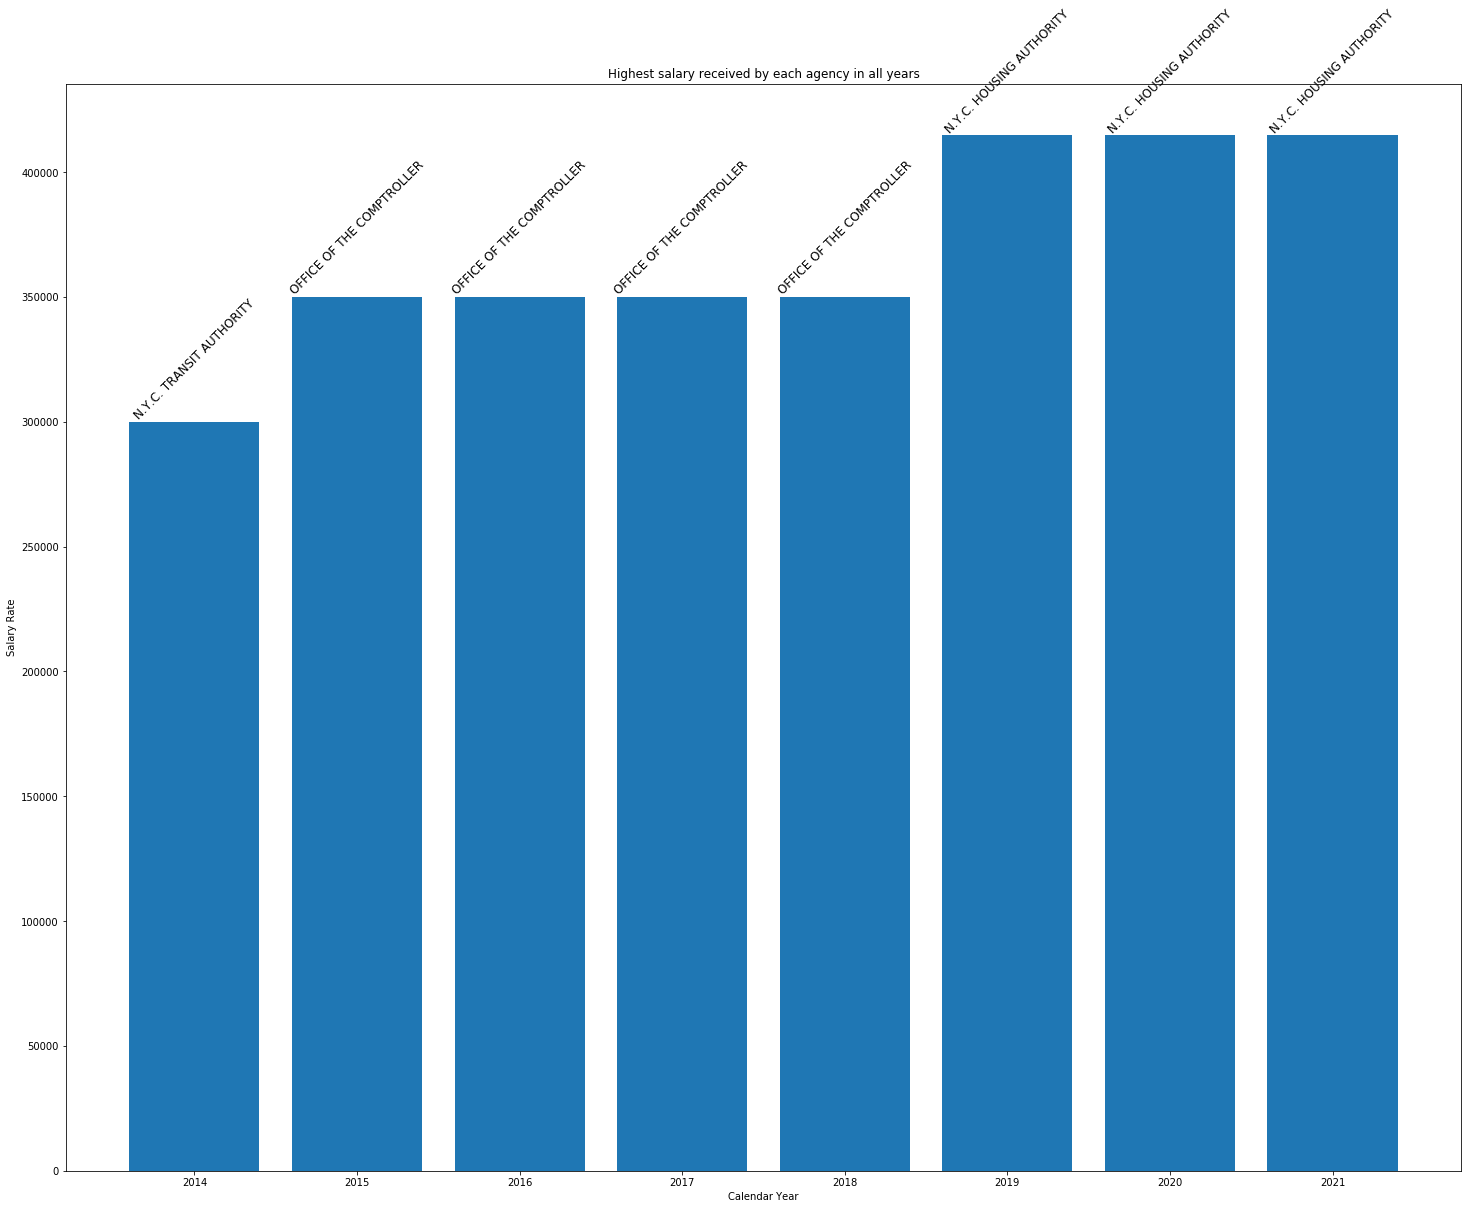

In [33]:
import matplotlib.pyplot as plt

# Prepare the data
calendar_year = results_dataframe['CALENDAR_YEAR'].tolist()
agency_name = results_dataframe['AGENCY_NAME'].tolist()
salary_rate = results_dataframe['SALARY_RATE'].tolist()

# Set the figure size
plt.figure(figsize=(25,20))

# Plot the bar graph
bars = plt.bar(x=calendar_year, height=salary_rate)

# Set the x-axis label
plt.xlabel('Calendar Year')

# Set the y-axis label
plt.ylabel('Salary Rate')

# Add agency name label for each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), agency_name[i], ha='center', va='bottom', fontsize=12, rotation=45)

plt.title("Highest salary received by each agency in all years")

# Show the plot
plt.show()


In [34]:
     #2021 highest salary and agency name.
from pyspark.sql.functions import desc, col

# Filter for data from 2021
data_frame_2021 = data_frame.filter(col('CALENDAR_YEAR') == 2021)

# Find employee with highest salary in 2021
highest_salary_in_2021 = data_frame_2021.select('EMPLOYEE_NAME', 'AGENCY_NAME', 'SALARY_RATE')\
                         .orderBy(desc('SALARY_RATE'))\
                         .first()

# Show the results
print(highest_salary_in_2021)


Row(EMPLOYEE_NAME='G P RUSS', AGENCY_NAME='N.Y.C. HOUSING AUTHORITY', SALARY_RATE=414707.0)


In [35]:
#2021 highest salary and name of employees
from pyspark.sql.functions import desc, col

# Filter for data from 2021
data_frame_2021 = data_frame.filter(col('CALENDAR_YEAR') == 2021)

# Find top 5 employees with highest salary in 2021
top_five_salaries_in_2021 = data_frame_2021.select('EMPLOYEE_NAME', 'AGENCY_NAME', 'SALARY_RATE')\
                         .orderBy(desc('SALARY_RATE'))\
                         .limit(5)


top_five_salaries_in_2021.show()


+-------------+--------------------+-----------+
|EMPLOYEE_NAME|         AGENCY_NAME|SALARY_RATE|
+-------------+--------------------+-----------+
|     G P RUSS|N.Y.C. HOUSING AU...|   414707.0|
|     A   DONE|OFFICE OF THE COM...|   350000.0|
| C   CIPRIANO|N.Y.C. TRANSIT AU...|   330140.0|
| S   FEINBERG|N.Y.C. TRANSIT AU...|   325000.0|
|     S S CHAN|OFFICE OF THE ACT...|   311885.0|
+-------------+--------------------+-----------+



In [54]:
#kmeans
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

# Filtering 2021 data 
df_2021 = data_frame.filter(col('CALENDAR_YEAR') == 2021)

# Choose the appropriate columns and eliminate  missing values

df_2021 = df_2021.select('PAY_CLASS', 'SALARY_RATE').na.drop()

# Convert  dataframe into a vectorized form
assembler = VectorAssembler(inputCols=['SALARY_RATE'], outputCol='features')
vector_df = assembler.transform(df_2021)

kmeans.setSeed(123)

# Cluster the agency names using K-means with 3 clusters
kmeans = KMeans(k=3, seed=1)
model = kmeans.fit(vector_df)

#Get all agency's projected cluster labels.

prediction_cluster = model.transform(vector_df)


prediction_cluster.show()


+---------+-----------+-------------------+----------+
|PAY_CLASS|SALARY_RATE|           features|prediction|
+---------+-----------+-------------------+----------+
|        D|    85292.0|          [85292.0]|         0|
|        A|   122000.0|         [122000.0]|         2|
|        A|    70000.0|          [70000.0]|         0|
|        A|   110419.0|         [110419.0]|         2|
|        A|    73394.0|          [73394.0]|         0|
|        A|   135513.0|         [135513.0]|         2|
|        A|    76271.0|          [76271.0]|         0|
|        A|   199603.0|         [199603.0]|         2|
|        D|   125531.0|         [125531.0]|         2|
|       03|    75755.0|          [75755.0]|         0|
|        D|    85292.0|          [85292.0]|         0|
|        A|    43940.0|          [43940.0]|         0|
|        A|    88517.0|          [88517.0]|         0|
|        E|     359.84|[359.8399963378906]|         1|
|        F|    83465.0|          [83465.0]|         0|
|        D

In [55]:
from pyspark.sql.functions import when
#naming theclusters
prediction_cluster = prediction_cluster.withColumn("prediction", when(prediction_cluster["prediction"] == 2, "highest-paying_cluster")
                                    .when(prediction_cluster["prediction"] == 1, "lowest_paying_cluster")
                                    .when(prediction_cluster["prediction"] == 0, "medium_level_payingcluster")
                                    .otherwise(prediction_cluster["prediction"]))

In [56]:
cluster=prediction_cluster.toPandas()

In [57]:
cluster

,PAY_CLASS,SALARY_RATE,features,prediction
0,D,85292.0,[85292.0],medium_level_payingcluster
1,A,122000.0,[122000.0],highest-paying_cluster
2,A,70000.0,[70000.0],medium_level_payingcluster
3,A,110419.0,[110419.0],highest-paying_cluster
4,A,73394.0,[73394.0],medium_level_payingcluster
...,...,...,...,...
297283,A,44083.0,[44083.0],medium_level_payingcluster
297284,D,109360.0,[109360.0],highest-paying_cluster
297285,F,83465.0,[83465.0],medium_level_payingcluster
297286,F,83465.0,[83465.0],medium_level_payingcluster


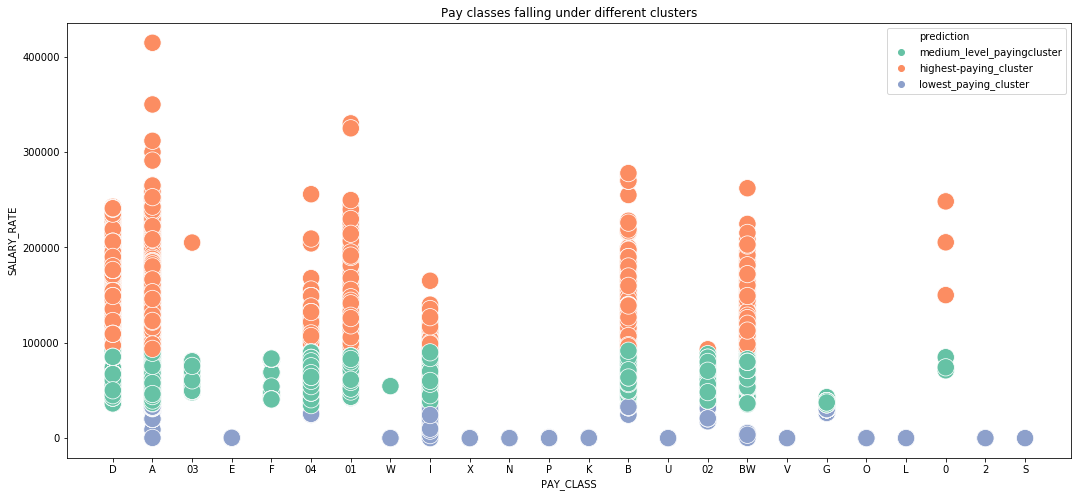

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,8))
sns.scatterplot(data=cluster, x='PAY_CLASS', y='SALARY_RATE', hue='prediction', palette='Set2', s=300)
plt.title("Pay classes falling under different clusters")
plt.show()

In [63]:
import pyspark.sql.functions as l

df_2021 = data_frame.filter(data_frame.CALENDAR_YEAR == "2021")

agg_df = df_2021.groupBy("PAY_CLASS").agg(l.count("EMPLOYEE_NAME").alias("NO_OF_EMPLOYEE"))

# Get the top 10 and least 10 pay classes by employee count
top_ten_pay_class = agg_df.orderBy(l.desc("NO_OF_EMPLOYEE")).limit(10)
least_ten_pay_class = agg_df.orderBy(l.asc("NO_OF_EMPLOYEE")).limit(10)




In [64]:
top_ten_pandas_df = top_ten_pay_class.toPandas()
least_ten_pandas_df = least_ten_pay_class.toPandas()

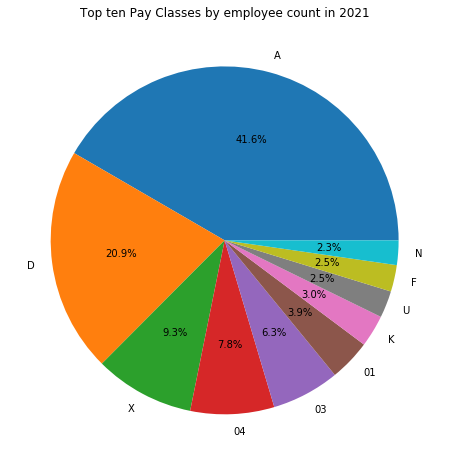

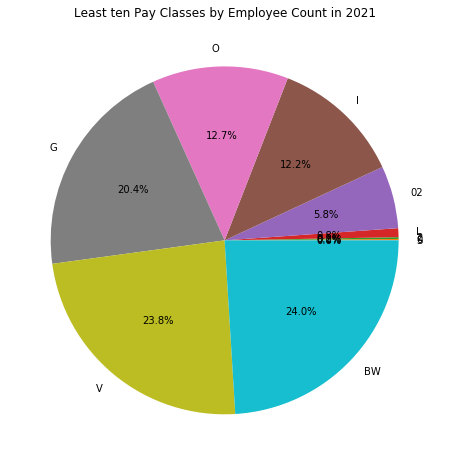

In [65]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 8))

# Pie chart for the top 10 pay
plt.pie(top_ten_pandas_df["NO_OF_EMPLOYEE"], labels=top_ten_pandas_df["PAY_CLASS"], autopct='%1.1f%%')

# Setting the title
plt.title("Top ten Pay Classes by employee count in 2021")

plt.show()

plt.figure(figsize=(9, 8))

# Pie chart for the least 10 pay
plt.pie(least_ten_pandas_df["NO_OF_EMPLOYEE"], labels=least_ten_pandas_df["PAY_CLASS"], autopct='%1.1f%%')

# Set the title
plt.title("Least ten Pay Classes by Employee Count in 2021")

plt.show()
